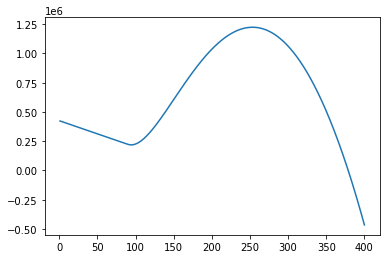

tau =  500
253.29414707353675


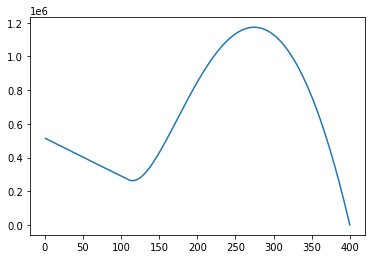

tau =  600
234.13256628314156


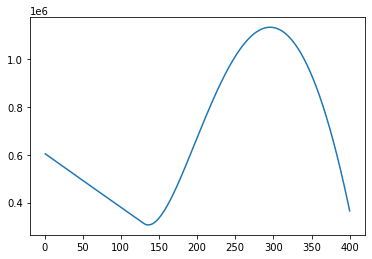

tau =  700
244.312156078039


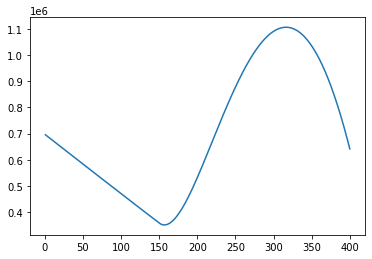

tau =  800
249.30215107553775


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

def I(u, tau = 500, del0=10, alpha = 5.0, lamb = 20.0, c1 = 40, c2 = 100, c3 = 50, d1 = 200, d2 = 220):
    
    
    f1 = lambda t: (alpha * d1 - c1) * (tau - alpha * t) 
    f2 = lambda t: (- alpha * d2 * (10 + (tau - alpha * t)/100)+ c2 * (5 - (tau - alpha * t)/5000)) * (tau - alpha * t)
    f3 = lambda t: (alpha * d1 - c1 * (10 - (tau - alpha * (u + del0) + lamb * (t - u - del0))/500)) * (tau - alpha * (u + del0) + lamb * (t - u - del0))
    f4 = lambda t: (- alpha * d2 * (10 + (tau - alpha * (u + del0) + lamb * (t - u - del0))/100) + c2 * (5 - (tau - alpha * (u + del0) + lamb * (t - u - del0))/5000)) * (tau - alpha * (u + del0) + lamb * (t - u - del0))
    
    
    S = 0
    S, _ = scipy.integrate.quad(f1, 0, u + del0)
    
    if (u <= tau / alpha - del0):
        S, _ = scipy.integrate.quad(f1, 0, u + del0)
        s1, _ = scipy.integrate.quad(f3, u + del0, (1 + alpha / lamb) * (u + del0))
        S += s1 - c3 * (alpha * (u + del0))
        
    if (u > tau / alpha - del0):
        S, _ = scipy.integrate.quad(f1, 0, tau / alpha)
        s2, _ = scipy.integrate.quad(f2, tau / alpha, u + del0)
        s3, _ = scipy.integrate.quad(f4, u + del0, (1 + alpha / lamb) * (u + del0) - tau / lamb)
        s4, _ = scipy.integrate.quad(f3, (1 + alpha / lamb) * (u + del0) - tau / lamb, (1 + alpha / lamb) * (u + del0))
        S += s2 + s3 + s4 - c3 * (alpha * (u + del0))
        
    S /= (1 + alpha / lamb) * (u + del0)
    
    return S

print()

x = np.linspace(1,400,2000)

y = []
mx = 0
x0 = 0
for i in x:
  y.append(I(u = i, tau = 500))
  if I(u = i, tau = 500)>mx:
    mx=I(i)
    x0=i
plt.plot(x,y)
plt.show()
print("tau = ",500)
print(x0)

y = []
mx = 0
x0 = 0
for i in x:
  y.append(I(u = i, tau = 600))
  if I(u = i, tau = 600)>mx:
    mx=I(i)
    x0=i
plt.plot(x,y)
plt.show()
print("tau = ",600)
print(x0)

y = []
mx = 0
x0 = 0
for i in x:
  y.append(I(u = i, tau = 700))
  if I(u = i, tau = 700)>mx:
    mx=I(i)
    x0=i
plt.plot(x,y)
plt.show()
print("tau = ",700)
print(x0)

y = []
mx = 0
x0 = 0
for i in x:
  y.append(I(u = i, tau = 800))
  if I(u = i, tau = 800)>mx:
    mx=I(i)
    x0=i
plt.plot(x,y)
plt.show()
print("tau = ",800)
print(x0)

